In [1]:
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import pandas as pd
import altair as alt;
alt.data_transformers.enable('json')
alt.renderers.enable('notebook')

%matplotlib inline

In [3]:
h_1M = mr.MesaData('mesa_data/1M_pre_ms_to_wd/LOGS/history.data')
h_1M_df = pd.DataFrame({'log_Teff': h_1M.log_Teff,
                        'log_L': h_1M.log_L,
                        'star_age': h_1M.star_age})

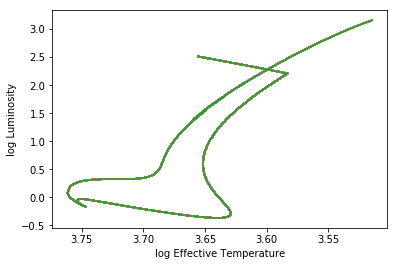

In [8]:
filename = 'hr_diagram_timestep'
for i in range(0,len(h_1M.log_Teff))[0::11]:
    plt.plot(h_1M.log_Teff[0:i],h_1M.log_L[0:i])
    plt.xlabel('log Effective Temperature')
    plt.ylabel('log Luminosity')
    plt.gca().invert_xaxis()
    plt.savefig(fname = 'images/00'+str(i)+'_'+filename+'.png')

In [36]:
h_1M.log_L[list(h_1M.star_age).index(h_1M.star_age.max())]

3.1553368877197663

<IPython.core.display.Javascript object>


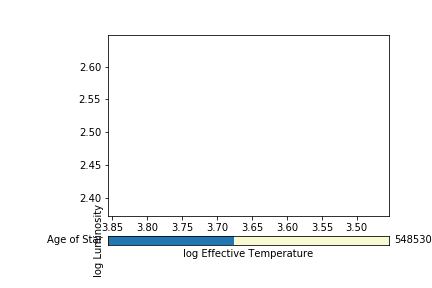

In [44]:
%matplotlib notebook

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
l, = plt.plot(h_1M.log_Teff[0],h_1M.log_L[0], lw=2)
# plt.axis([h_1M.log_Teff.min() - 0.01*h_1M.log_Teff.min(), 
#           h_1M.log_Teff.max() + 0.01*h_1M.log_Teff.max(), 
#           h_1M.log_L.min() + 0.3*h_1M.log_L.min(), 
#           h_1M.log_L.max() + 0.1*h_1M.log_L.max()])
plt.gca().invert_xaxis()

axcolor = 'lightgoldenrodyellow'
axtime = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

stime = Slider(axtime, 'Age of Star', h_1M.star_age.min(), h_1M.star_age.max(), valinit=h_1M.star_age.min())


def update(val):
#     l.set_xdata(h_1M.log_Teff[list(h_1M.star_age).index(stime.val)])
    l.set_ydata(h_1M.log_L[list(h_1M.star_age).index(stime.val)])
    fig.canvas.draw_idle()
stime.on_changed(update)

plt.show()

In [ ]:
def update_time()

In [4]:
hr_diagram = alt.Chart(h_1M_df).mark_circle(size=1).encode(
    x=alt.X('log_Teff', 
            axis=alt.Axis(title='Temperature (K)')),
    y=alt.Y('log_L', 
            axis=alt.Axis(title=r'Luminosity (L☉)'),
            ))
#     color=alt.Color('temp', scale=alt.Scale(range=['red','blue'])))

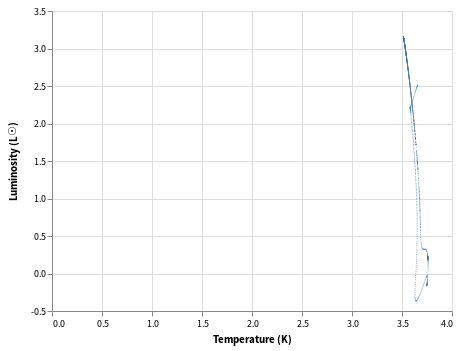

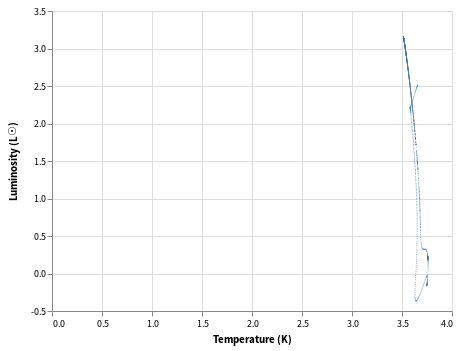

In [5]:
hr_diagram

In [45]:
h_15M = mr.MesaData('mesa_data/15M_at_TAMS/LOGS/history.data')

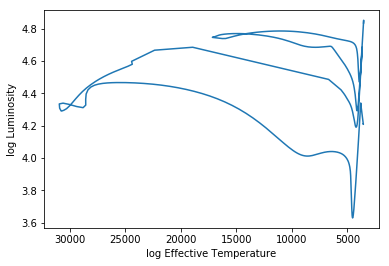

In [49]:
%matplotlib inline 
plt.plot(10**h_15M.log_Teff,h_15M.log_L)
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')
plt.gca().invert_xaxis()
plt.show()

[HYG Database](http://www.astronexus.com/hyg)
contains all ~120,000 stars that are either:  

- brighter than a certain magnitude cutoff (magnitude +7.5 to +9.0) or 
- within 50 parsecs (about 160 light years) from the Sun.""


In [8]:
df = pd.read_csv('http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz')
# df=df.sample(5000)

HYG dataset reports flux ratio 'color index' $B-V$; can be transformed to temperature using:
$${\displaystyle T=4600\,\mathrm {K} \left({\frac {1}{0.92(B-V)+1.7}}+{\frac {1}{0.92(B-V)+0.62}}\right).}$$
(Ballesteros 2012)

In [9]:
df.loc[:,'temp'] = 4600 * (1 / (0.92 * df.ci + 1.7) + 1 / (0.92 * df.ci + 0.62))

In [10]:
star_chart = alt.Chart(df).mark_circle(size=1).encode(
    x=alt.X('temp', 
            axis=alt.Axis(title='Temperature (K)')),
    y=alt.Y('lum', 
            axis=alt.Axis(title=r'Luminosity (L☉)'),
            scale=alt.Scale(type='log')),
    color=alt.Color('temp', scale=alt.Scale(range=['red','blue'])))

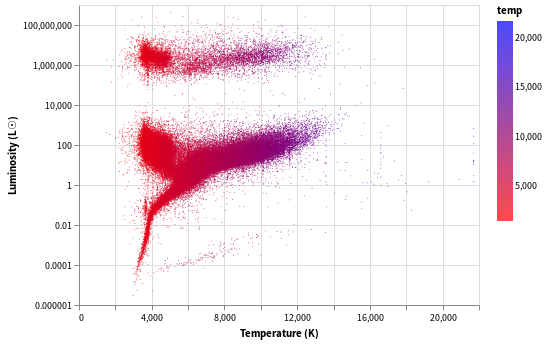

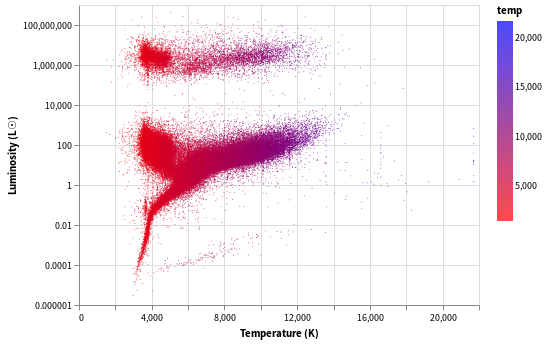

In [11]:
star_chart

/usr/lib/python3.7/site-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


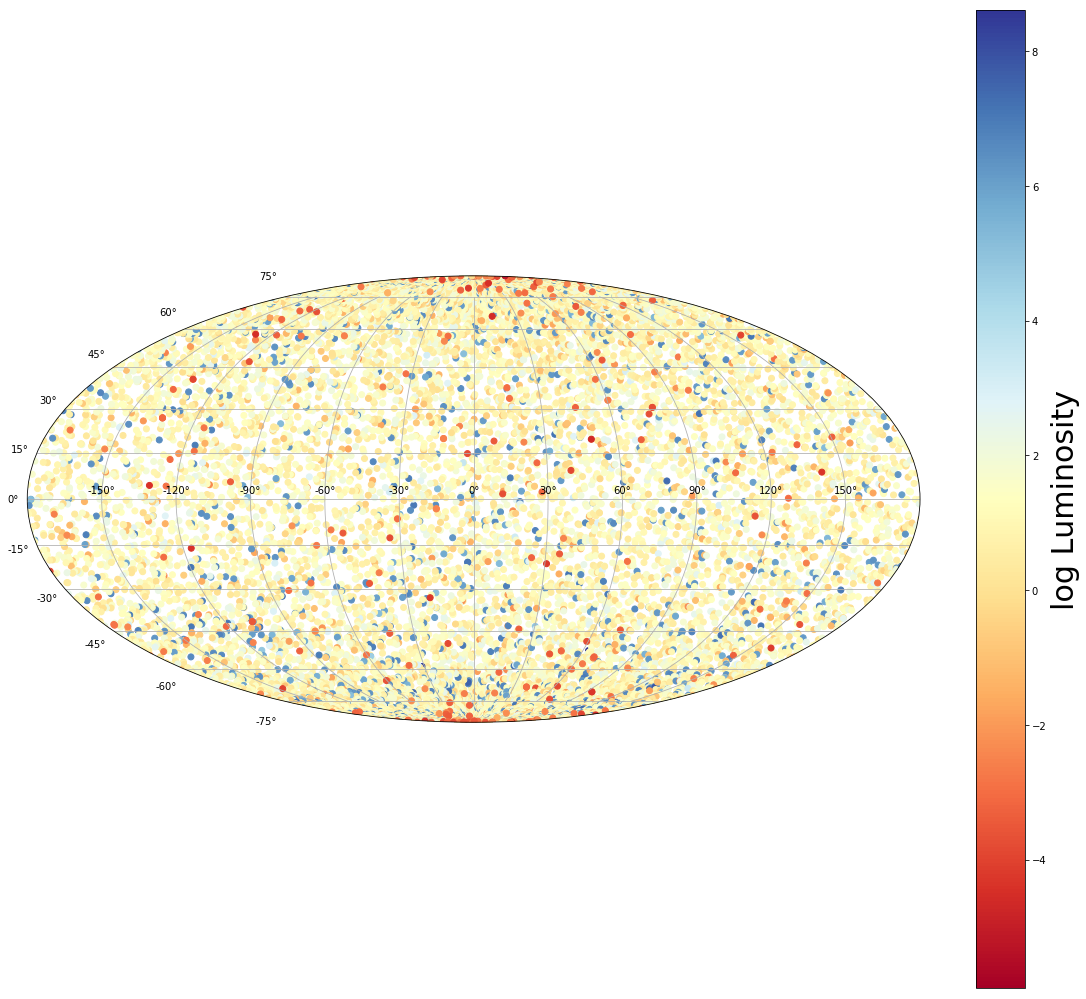

In [12]:
fig = plt.figure(figsize=(20,18))
ax = fig.add_subplot(111, projection="mollweide")
scatter = ax.scatter(df.ra.values, df.dec.values, c=np.log10(df.lum.values), cmap="RdYlBu")
cbar = fig.colorbar(scatter)
cbar.set_label('log Luminosity',fontsize=30)
# ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'],fontsize=20)
ax.grid(True)
plt.show()

In [13]:
df.loc[:,'spectral_type'] = df.spect.str.slice(0,1)
# df.spectral_type.drop_duplicates()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


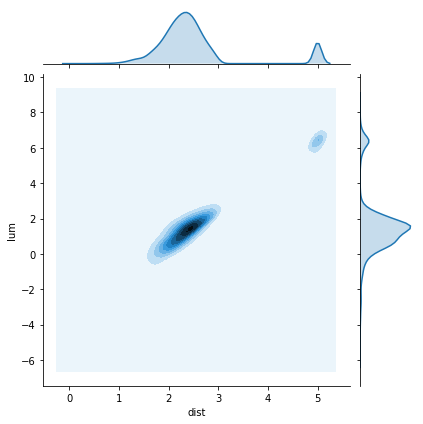

In [15]:
data = np.log10(df.loc[:,['dist', 'lum']]).replace(
     [np.inf, -np.inf], np.nan).dropna()
sns.jointplot(data=data, x='dist', y='lum', kind='kde')
plt.show()

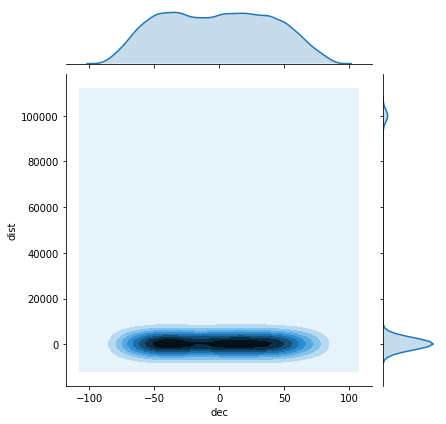

In [16]:
data = df.loc[:,['ra', 'dec', 'dist']].replace(
     [np.inf, -np.inf], np.nan).dropna()
sns.jointplot(x=data.dec, y=(data.dist), kind='kde')
plt.show()